In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
base_dir = r"C:\Users\Soumil\OneDrive\Desktop\PlantVillage"

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Image Data Generators with Augmentation for the Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test Data Generators without Augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 38504 images belonging to 15 classes.
Found 4815 images belonging to 15 classes.
Found 4815 images belonging to 15 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/50
1203/1203 [==============================] - 611s 507ms/step - loss: 1.9232 - accuracy: 0.3649 - val_loss: 1.5934 - val_accuracy: 0.4952
Epoch 2/50
1203/1203 [==============================] - 320s 266ms/step - loss: 1.2214 - accuracy: 0.5973 - val_loss: 1.1633 - val_accuracy: 0.6217
Epoch 3/50
1203/1203 [==============================] - 366s 304ms/step - loss: 0.9934 - accuracy: 0.6731 - val_loss: 0.7743 - val_accuracy: 0.7448
Epoch 4/50
1203/1203 [==============================] - 397s 330ms/step - loss: 0.8623 - accuracy: 0.7160 - val_loss: 1.0273 - val_accuracy: 0.6775
Epoch 5/50
1203/1203 [==============================] - 369s 307ms/step - loss: 0.7651 - accuracy: 0.7474 - val_loss: 0.5739 - val_accuracy: 0.8138
Epoch 6/50
1203/1203 [==============================] - 363s 302ms/step - loss: 0.6729 - accuracy: 0.7785 - val_loss: 0.6292 - val_accuracy: 0.7923
Epoch 7/50
1203/1203 [==============================] - 376s 313ms/step - loss: 0.5995 - accuracy: 0.8007 - val_

In [6]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

150/150 [==============================] - 39s 260ms/step - loss: 0.3383 - accuracy: 0.9054
Test accuracy: 0.9054166674613953


In [7]:
# Save the model in H5 format
model.save('CNN_PlantVillage.h5')

In [8]:
import pickle
# Save the model in PKL format
model_structure = model.to_json()
model_weights = model.get_weights()

# Save model structure
with open('CNN_PlantVillage_structure.pkl', 'wb') as structure_file:
    pickle.dump(model_structure, structure_file)

# Save model weights
with open('CNN_PlantVillage_weights.pkl', 'wb') as weights_file:
    pickle.dump(model_weights, weights_file)

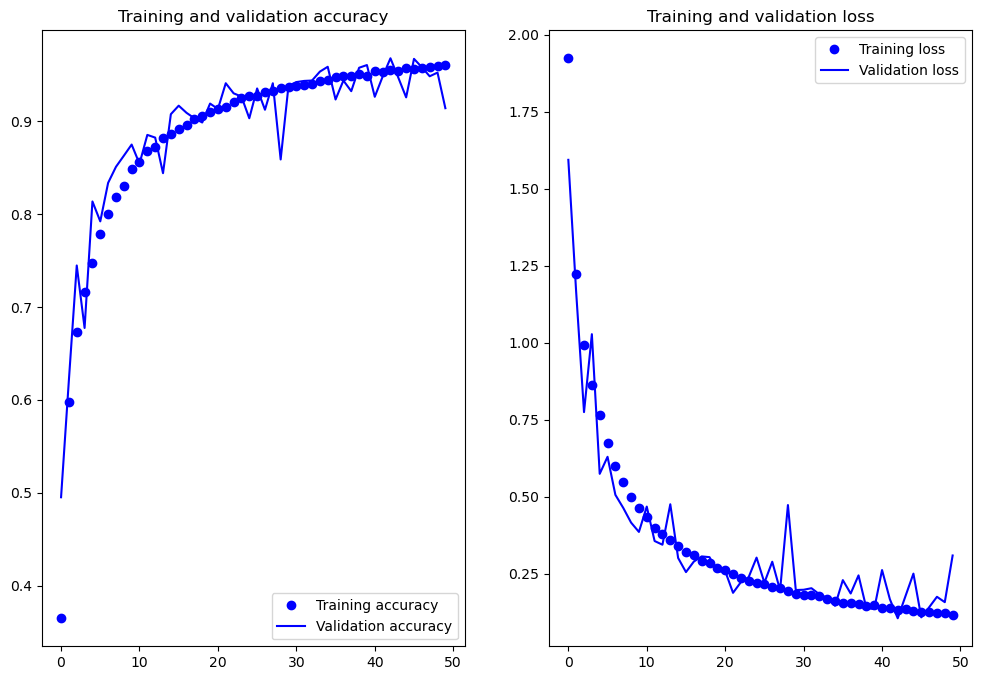

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
